In [1]:
from xarray import DataArray

from weldx import Q_, GenericSeries, LinearHorizontalTraceSegment, Trace
from weldx.core import SpatialSeries
from weldx.geometry import DynamicTraceSegment
import numpy as np
import matplotlib.pyplot as plt

## Discrete

In [2]:
data = DataArray(
    Q_([[0,0,0], [0,5,0], [1,5,0], [1,9,0]], "mm"), 
    dims=["s","c"], 
    coords=dict(
        c=["x", "y", "z"], 
        s=DataArray(Q_([0, 0.5, 0.6, 1],""), dims=["s"]).pint.dequantify()
    )
)
series_disc = SpatialSeries(data)

In [3]:
segment_disc = DynamicTraceSegment(series_disc)

In [4]:
segment_disc.local_coordinate_system(0.55)

<LocalCoordinateSystem>
Dimensions:      (c: 3, v: 3)
Coordinates:
  * c            (c) <U1 'x' 'y' 'z'
  * v            (v) int32 0 1 2
Data variables:
    orientation  (v, c) float64 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0
    coordinates  (c) float64 [mm] 0.5 5.0 0.0

In [5]:
trace_disc = Trace([segment_disc, segment_disc])

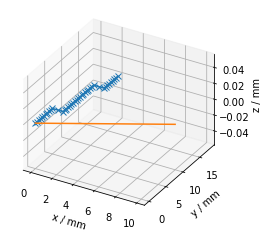

In [6]:
trace_disc.plot("0.5mm")
ax = plt.gca()
ax.plot([0,10],[0,10])

## Expression

In [7]:
expr = "a*sin(s)+b*cos(s)+c*s/10+d "
# expr = "x+y+z"
params = dict(
    a=DataArray(Q_([1, 0, 0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
    b=DataArray(Q_([0, 1, 0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
    c=DataArray(Q_([0, 0, 2], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
    d=DataArray(Q_([0, -1, 0], "mm"), dims=["c"], coords=dict(c=["x", "y", "z"])),
)
sps = SpatialSeries(expr, parameters=params)

In [8]:
segment = DynamicTraceSegment(sps, 2*np.pi)

In [9]:
trace = Trace([segment, segment, segment])

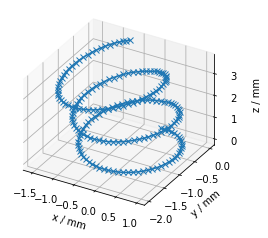

In [10]:
trace.plot("0.1mm")


In [11]:
trace.length

array(19.22285069) <Unit('millimeter')>

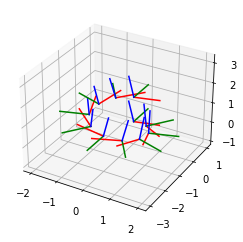

In [12]:
from weldx import LocalCoordinateSystem

from weldx.visualization.matplotlib_impl import draw_coordinate_system_matplotlib, axes_equal
num_lcs = 11
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(num_lcs):
    lcs = segment.local_coordinate_system(i/(num_lcs-1))
    lcs = LocalCoordinateSystem(lcs.orientation, lcs.coordinates.data.m)
    draw_coordinate_system_matplotlib(lcs, ax)
axes_equal(ax)